In [35]:
from og_marl.offline_dataset import calculate_returns, analyse_vault
from flashbax.vault import Vault
import jax

Loading vault found at /home/claude/Documents/og-marl/vaults/lbf/8x8-2p-2f-coop.vlt/Replay


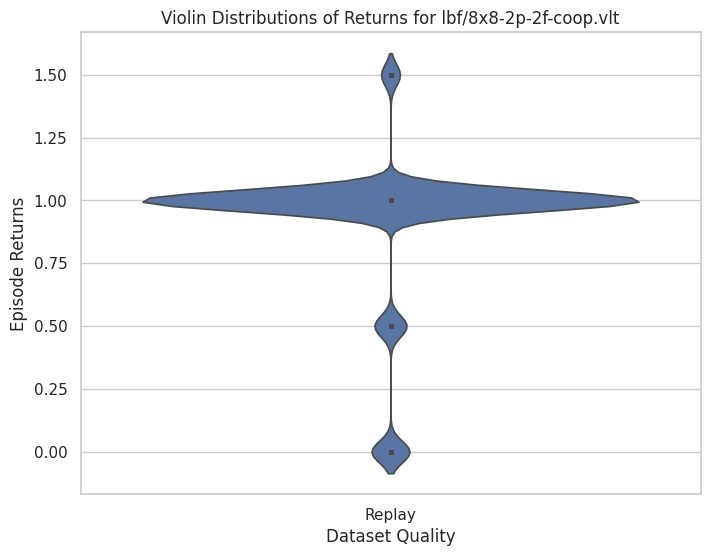

In [55]:
x = analyse_vault("lbf/8x8-2p-2f-coop.vlt", visualise=True)

3468

In [56]:
vlt = Vault(vault_name="lbf/8x8-2p-2f-coop.vlt", vault_uid="Replay", rel_dir="vaults")

Loading vault found at /home/claude/Documents/og-marl/vaults/lbf/8x8-2p-2f-coop.vlt/Replay


In [57]:
exp = vlt.read().experience

In [58]:
terminals = exp["terminals"]
terminals.shape

(144, 2304, 2)

In [59]:
import jax.numpy as jnp

terminals = jnp.concatenate((terminals[:,1:,:], jnp.zeros((144,1,2))), axis=1)

In [60]:
truncations = jax.numpy.zeros_like(terminals)

In [61]:
exp["terminals"] = terminals
exp["truncations"] = truncations

In [62]:
print(jax.tree_map(lambda x: x.shape, exp))


{'actions': (144, 2304, 2), 'infos': {'legals': (144, 2304, 2, 6), 'state': (144, 2304, 24)}, 'observations': (144, 2304, 2, 12), 'rewards': (144, 2304, 2), 'terminals': (144, 2304, 2), 'truncations': (144, 2304, 2)}


In [54]:
terminals[0,98,0]
jnp.min(exp["rewards"])

Array(0., dtype=float32)

In [63]:
from flashbax.buffers.trajectory_buffer import TrajectoryBufferState

state = TrajectoryBufferState(
    experience=exp,
    current_index=2304,
    is_full=True,
)

vlt = Vault(
    vault_name="",
    vault_uid="",
    experience_structure=exp,
)
vlt.write(state)

New vault created at /home/claude/Documents/og-marl/vaults/20240315173309
Since the provided buffer state has a temporal dimension of 2304, you must write to the vault at least every 2303 timesteps to avoid data loss.


2304

In [ ]:
buffer_state = buffer.init(
    
)

import numpy as np

ep_returns = []
ep_return = 0
for j in range(3):
    for i in range(len(terminal)):
        ep_return += rewards[i]

        if terminal[i] == True:
            ep_returns.append(ep_return)
            ep_return = 0


print(np.mean(ep_returns))

In [26]:
import jax.numpy as jnp
from flashbax.buffers.trajectory_buffer import TrajectoryBufferState

def transform_buffer_state(state):
    experience = {}
    experience["observations"] = state.experience["obs"]["agents_view"]
    experience["act"] = state.experience["action"]
    experience["rew"] = jnp.repeat(state.experience["reward"], axis=2, repeats=2)
    experience["done"] = jnp.repeat(state.experience["done"], axis=2, repeats=2)
    experience["legals"] = state.experience["obs"]["action_mask"]
    experience["mask"] = jnp.ones((*experience["act"].shape[:2],))
    experience["env_state"] = jnp.reshape(experience["obs"], (*experience["obs"].shape[:2],-1))
    state = TrajectoryBufferState(experience=experience, is_full=state.is_full, current_index=state.current_index)
    return state

In [27]:
new_state = transform_buffer_state(exp)

In [28]:
new_state.experience

{'obs': Array([[[[ 1,  0,  3, ...,  0,  1,  0],
          [ 0,  1,  1, ...,  0,  0,  0]],
 
         [[ 1,  0,  3, ...,  0,  1,  0],
          [ 0,  1,  1, ...,  0,  0,  0]],
 
         [[ 1,  0,  3, ...,  0,  1,  0],
          [ 0,  1,  1, ...,  0,  0,  0]],
 
         ...,
 
         [[ 1,  0,  5, ...,  0,  1,  0],
          [ 0,  1,  9, ...,  0,  0,  0]],
 
         [[ 1,  0,  5, ...,  0,  1,  0],
          [ 0,  1,  9, ...,  0,  0,  0]],
 
         [[ 1,  0,  5, ...,  0,  1,  0],
          [ 0,  1,  9, ...,  0,  0,  0]]],
 
 
        [[[ 1,  0,  1, ...,  0,  0,  0],
          [ 0,  1, 10, ...,  0,  0,  0]],
 
         [[ 1,  0,  1, ...,  0,  0,  0],
          [ 0,  1, 10, ...,  0,  0,  0]],
 
         [[ 1,  0,  1, ...,  0,  0,  0],
          [ 0,  1, 10, ...,  0,  0,  0]],
 
         ...,
 
         [[ 1,  0,  7, ...,  0,  1,  0],
          [ 0,  1,  6, ...,  0,  1,  0]],
 
         [[ 1,  0,  7, ...,  0,  1,  0],
          [ 0,  1,  6, ...,  0,  1,  0]],
 
         [[ 1,  0,  6, 